# CPS 3.1 Monte Carlo approximation of the Greeks

# Question 1:

In [8]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.stats import norm

In [9]:
n = 100
sigma = 0.4
S0 = 100
T = 2 #years
mean = 0 
std = 1 
r = 0.02
sample_size = 10000
K = 80

In [10]:
#forward simulation of the brownian motion  

def forward_simulation(n=n, T=T):
    delta_T = T / n
    Z = np.random.normal(mean, std, size=n)
    Z = np.sqrt(delta_T) * Z
    w = np.cumsum(Z, axis=0)
    return w


In [11]:
def d_moins(x, v): 
    res = np.log(x) / np.sqrt(v) - 1 / 2 * np.sqrt(v)
    return res

def price_binary_option(r=r, sigma=sigma, S0=S0, T=T, K=K):
    X0 = S0 / K * np.exp(r * T) 
    return np.exp(- r * T) * norm.cdf(- d_moins(X0, sigma ** 2 * T))

def opt_hedging(r=r, sigma=sigma, S0=S0, T=T, K=K):
    X0 = S0 / K * np.exp(r * T) 
    x = - d_moins(X0, sigma ** 2 * T)
    N_prime = 1 / np.sqrt(2 * np.pi) * np.exp(- x ** 2 / 2)
    return - np.exp(- r * T) / (S0 * np.sqrt(sigma ** 2 * T)) * N_prime

In [12]:
C0 = price_binary_option(r, sigma, S0, T, K)
Delta_0 = opt_hedging(r, sigma, S0, T, K)

print("K = %d" %(K))       
print("exact price C0 = %1.3f " %(C0))
print("exact optimal hedging strategy = %1.3f " %(Delta_0))

K = 80
exact price C0 = 0.411 
exact optimal hedging strategy = -0.007 


In [13]:
#monte carlo price and optimal hedging strategy:

def copies_BT(n=n, T=T, M=sample_size):
    B = np.zeros(M)
    for j in range(M): 
        W = forward_simulation(n, T) 
        B[j] = W[-1]
    return B

def ST_samples(n=n, T=T, M=sample_size, r=r, sigma=sigma, S0=S0):
    B = copies_BT(n, T, M)
    ST = np.zeros(M)
    for j in range(M):
        ST[j] = S0 * np.exp((r - sigma ** 2 / 2) * T + sigma * B[j])
    return ST

S_samples = ST_samples(n, T, sample_size, r, sigma, S0)

def Monte_carlo_pricing(S_samples = S_samples, T=T, M=sample_size, K=K):
    Ind_samples = np.where(S_samples <= K, 1, 0)
    est_C0 = np.exp(- r * T) / M * np.sum(Ind_samples)
    return est_C0


In [14]:
est_C0 = Monte_carlo_pricing(S_samples, T, sample_size, K)


print("K = %d" %(K))    
print("M = %d" %(sample_size))   
print("estimated price price C0 = %1.3f " %(est_C0))


K = 80
M = 10000
estimated price price C0 = 0.400 


In [15]:
Ks = np.arange(80, 121)
X = [ price_binary_option(r, sigma, S0, T, K) for K in Ks ]
X_carlo = [ Monte_carlo_pricing(S_samples, T, sample_size, K) for K in Ks]

Sample size = 10000


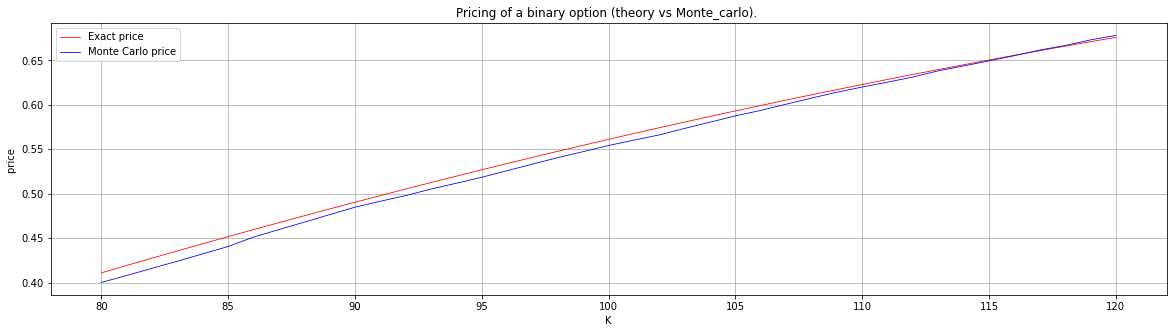

In [16]:
#ploting
plt.figure(figsize=(20,5))
plt.plot(Ks, X, 'r-', linewidth=0.8, label='Exact price')
plt.plot(Ks, X_carlo, 'b-', linewidth=0.8, label='Monte Carlo price')
plt.legend()
plt.xlabel("K")
plt.ylabel("price ")
plt.title('Pricing of a binary option (theory vs Monte_carlo). ')
print("Sample size = %d" %(10**4))  
plt.grid()

In [17]:
S_samples2 = ST_samples(n=n, T=T, M=10**6, r=r, sigma=sigma, S0=S0)
X_carlo2 = [ Monte_carlo_pricing(S_samples = S_samples2, T=T, M=10**6, K=K) for K in Ks]

Sample size = 1000000


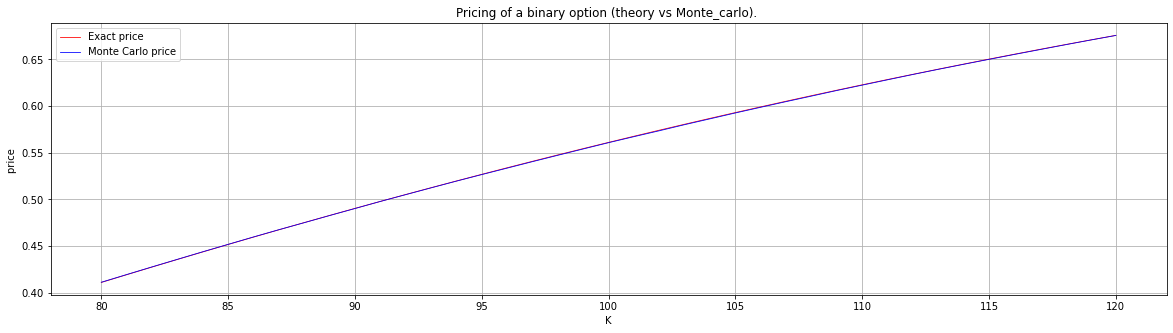

In [18]:
#ploting
plt.figure(figsize=(20,5))
plt.plot(Ks, X, 'r-', linewidth=0.8, label='Exact price')
plt.plot(Ks, X_carlo2, 'b-', linewidth=0.8, label='Monte Carlo price')
plt.legend()
plt.xlabel("K")
plt.ylabel("price ")
plt.title('Pricing of a binary option (theory vs Monte_carlo). ')
print("Sample size = %d" %(10**6))   
plt.grid()

# Question 2:

In [19]:
def finite_difference(eps, M=sample_size, r=r, sigma=sigma, S0=S0, K=K):
    S_pluseps = ST_samples(n=n, T=T, M=sample_size, r=r, sigma=sigma, S0=S0 + eps)
    S_moinseps = ST_samples(n=n, T=T, M=sample_size, r=r, sigma=sigma, S0=S0 - eps)
    C2 = Monte_carlo_pricing(S_samples = S_pluseps, T=T, M=sample_size, K=K)
    C1 = Monte_carlo_pricing(S_samples = S_moinseps, T=T, M=sample_size, K=K)
    return (C2 - C1) / (2 * eps)

In [20]:
epss = np.arange(1, 100, 1)
Y = [ finite_difference(eps, M=sample_size, r=r, sigma=sigma, S0=S0, K=K) for eps in epss]

Sample size = 10000


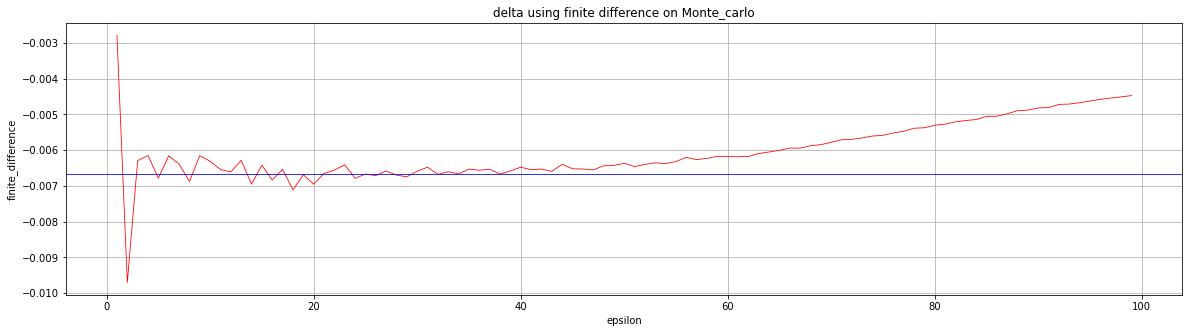

In [21]:
#ploting
plt.figure(figsize=(20,5))
plt.plot(epss, Y, 'r-', linewidth=0.8)
plt.axhline(y = Delta_0, color = 'b', linestyle = '-', linewidth=0.8)
plt.xlabel("epsilon")
plt.ylabel("finite_difference")
plt.title('delta using finite difference on Monte_carlo')
print("Sample size = %d" %(sample_size))  
plt.grid()
plt.show()

# Question 3:

In [22]:
def ST_samples_B(n=n, T=T, M=sample_size, r=r, sigma=sigma, S0=S0):
    B = copies_BT(n, T, M)
    ST = np.zeros(M)
    for j in range(M):
        ST[j] = S0 * np.exp((r - sigma ** 2 / 2) * T + sigma * B[j])
    return ST, B

S_samples2 = ST_samples_B(n, T, sample_size, r, sigma, S0)

def Monte_carlo_delta(S_samples = S_samples, T=T, M=sample_size, K=K):
    ST = S_samples[0]
    BT = S_samples[1]
    Ind_samples = np.where(ST <= K, 1, 0) *  BT / (S0 * sigma * T)
    est_delta0 = np.exp(- r * T) / M * np.sum(Ind_samples)
    return est_delta0


In [23]:
Ks = np.arange(80, 121)
Xdelta = [ opt_hedging(r, sigma, S0, T, K) for K in Ks ]
X_deltacarlo = [ Monte_carlo_delta(S_samples2, T, sample_size, K) for K in Ks]

Sample size = 10000


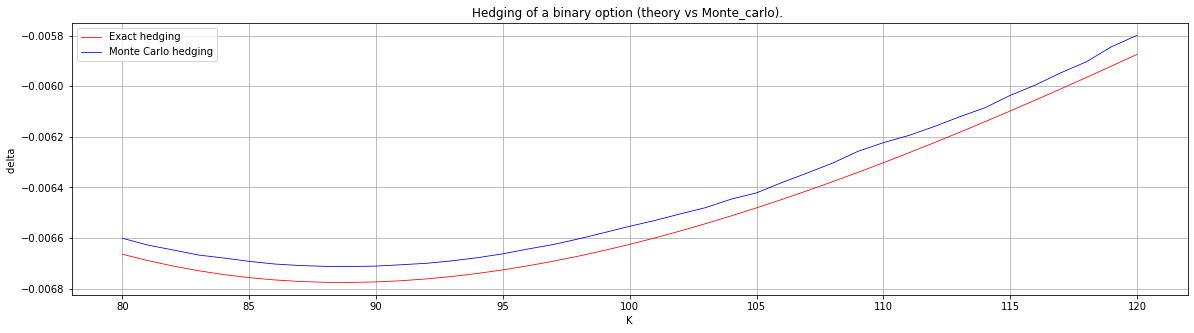

In [24]:
#ploting
plt.figure(figsize=(20,5))
plt.plot(Ks, Xdelta, 'r-', linewidth=0.8, label='Exact hedging')
plt.plot(Ks, X_deltacarlo, 'b-', linewidth=0.8, label='Monte Carlo hedging')
plt.legend()
plt.xlabel("K")
plt.ylabel("delta ")
plt.title('Hedging of a binary option (theory vs Monte_carlo). ')
print("Sample size = %d" %(10**4))  
plt.grid()

In [25]:
Ks = np.arange(40, 150)
Xdelta = [ opt_hedging(r, sigma, S0, T, K) for K in Ks ]
X_deltacarlo = [ Monte_carlo_delta(S_samples2, T, sample_size, K) for K in Ks]

In [26]:
#ploting
plt.figure(figsize=(20,5))
plt.plot(Ks, - Xdelta4, 'r-', linewidth=0.8, label='Exact hedging')
plt.plot(Ks, - X_deltacarlo4, 'b-', linewidth=0.8, label='Monte Carlo hedging')
plt.legend()
plt.xlabel("K")
plt.ylabel("delta ")
plt.title('Hedging of a binary option (theory vs Monte_carlo). ')
print("Sample size = %d" %(10**4))  
plt.grid()

NameError: name 'Xdelta4' is not defined

<Figure size 1440x360 with 0 Axes>

In [ ]:
S_samples3 = ST_samples_B(n, T, 10**6, r, sigma, S0)
Ks = np.arange(80, 121)
X_deltacarlo2 = [ Monte_carlo_delta(S_samples3, T, 10**6, K) for K in Ks]

In [ ]:
#ploting
plt.figure(figsize=(20,5))
plt.plot(Ks, Xdelta, 'r-', linewidth=0.8, label='Exact hedging')
plt.plot(Ks, X_deltacarlo2, 'b-', linewidth=0.8, label='Monte Carlo hedging')
plt.legend()
plt.xlabel("K")
plt.ylabel("delta ")
plt.title('Hedging of a binary option (theory vs Monte_carlo). ')
print("Sample size = %d" %(10**6))  
plt.grid()